In [1]:
from Bio import AlignIO
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord # dont't do 'from Bio import SeqRecord', it import only module name
from Bio.Alphabet import generic_dna


In [2]:
from random import randint

In [3]:
from seqman import genseq

In [4]:
genseq?

- pdistance function to calculate distance :

In [6]:
def pdistance(seq1, seq2):
    p = 0
    pairs = []
    for x in zip(seq1,seq2):
        if '-' not in x: pairs.append(x)
    #for (x,y) in zip(seq1,seq2):
    for (x,y) in pairs:
        if x != y:
            p += 1
    #length = (len(seq1) + len(seq2)) / 2
    length = len(pairs)
    return float(p) / length

In [50]:
a = genseq(10000)
b = genseq(10000)
c = genseq(10000)
d = genseq(10000)
e = genseq(10000)

In [51]:
align = MultipleSeqAlignment([SeqRecord(Seq(a), id="a"),
                              SeqRecord(Seq(b), id="b"),
                             SeqRecord(Seq(c), id="c"),
                              SeqRecord(Seq(d), id="d"),
                              SeqRecord(Seq(e), id="e")])

In [52]:
align

<<class 'Bio.Align.MultipleSeqAlignment'> instance (5 records of length 10000, Alphabet()) at 215073d2e10>

In [9]:
align[0]

SeqRecord(seq=Seq('CTTCCCTTTCGGAATATCCCGACTACATGATTGTGATGTTATTGTAGCTTTCGA...GAC', Alphabet()), id='a', name='<unknown name>', description='<unknown description>', dbxrefs=[])

In [37]:
len(align) # return number of rows which is number of sequences in the alignment

3

In [38]:
align[0].id # return id of a certain sequence

'a'

In [53]:
pot_rec = int(input("enter the index of the sequence to analyze")) # potential recombinant's index in the alignment

enter the index of the sequence to analyze1


In [68]:
window_size = 100 
steps = len(align[0, :]) // window_size
print(steps)
start = 0

100


In [69]:
distance_data = {} #dictionary to store 'seq_vs_seq ids : distance data' 

In [70]:
# creating list of potential parents, which is the indices of the seqs except the recombinant under study
parents = list(range(0, len(align))) 
parents.remove(pot_rec) # here we remove from the index list the index of the recombinant under study by its value, 
                        # which is the index for the alignment

In [71]:
for par in parents:
    dist_container = []
    start = 0
    for step in range(0 , steps):
        finish = start + window_size + 1
        print("start: ", start, " finish: ", finish)
        seq1 = align[pot_rec, start:finish].seq # here is potential recombinant sequence slice
        print(seq1)
        seq2 = align[par, start:finish].seq # here's parent
        print(seq2)   
        dist = pdistance(seq1, seq2)
        print(dist)
        dist_container.append(dist)
        print(dist_container)
        start = finish - 1
        print("-----------------")
    distance_data[align[pot_rec].id + "_vs_" + align[par].id] = dist_container
        

start:  0  finish:  101
ATTACTCTGGCTTTGGAGTAGGTTGGTCCTTCCAGGCATCAGTAATTAGGTACGCACATCACGATAATGGTAGGTCTCTCGGGTACCTCTAGTGACACCAC
GCAATTCCTGCGCGTGCGTTCCCCAACATTCATGTTCTAGCATTAAAGTTTGCTGACCGTCGTTCACGGAACGCTAATTTGGTCGCTTACTTTTAGTGGAT
0.7227722772277227
[0.7227722772277227]
-----------------
start:  100  finish:  201
CTGTATATATGCCATATGGGCCGTTGGTTAATGAATAGAGCGCCAAATTGCTTGATCATGAATATCAGAATATACCGCGGGTTAACATGGCATAGACGCCC
TGGAGTTCTTCCAGGTGCATACGAGTAGTGGAGCATTGCTAACTTTGTAAACGAAGCTGTCCGGCTACTATTGCTCGATCATTAGCCACCAGCCGTGCCCT
0.7326732673267327
[0.7227722772277227, 0.7326732673267327]
-----------------
start:  200  finish:  301
CGTACATCGACTAACATTCGAGACAAATAAGCCCATTGTATATACCTCACTTCTTTTTAGGCTACCCAACCCTGCAAGACCGTTCTACCGCGCACTACATT
TTCAGTATCGGATGACAGTCCGTTACGATTTCGGAAGTCGCTTGGACTGCCGGAGCTTATCTTCATGTCTCTGGCACATGGAGGTATGCCTCCTCACTTGG
0.8217821782178217
[0.7227722772277227, 0.7326732673267327, 0.8217821782178217]
-----------------
start:  300  finish:  401
TGCAACCACAGACTGCAGCTGTGTAGATACGGCCTCATACGGCGTCTGCAGT

ATAGCCGTGCTGTTTACTCCGCTTGGAAGGCGAGTGCAATCGCATATAGTTGAACCTCAGTTATTTGCAGTGCCTAGAGCCACGAGGGTTTCAATTGTCA
0.76
[0.7722772277227723, 0.7128712871287128, 0.8217821782178217, 0.7821782178217822, 0.801980198019802, 0.8217821782178217, 0.801980198019802, 0.7821782178217822, 0.6435643564356436, 0.7524752475247525, 0.7524752475247525, 0.7227722772277227, 0.7524752475247525, 0.801980198019802, 0.7623762376237624, 0.7722772277227723, 0.6831683168316832, 0.7227722772277227, 0.7623762376237624, 0.7425742574257426, 0.7722772277227723, 0.6534653465346535, 0.7524752475247525, 0.7524752475247525, 0.801980198019802, 0.7326732673267327, 0.693069306930693, 0.801980198019802, 0.7425742574257426, 0.7227722772277227, 0.7227722772277227, 0.7029702970297029, 0.8415841584158416, 0.7227722772277227, 0.7722772277227723, 0.6831683168316832, 0.7524752475247525, 0.801980198019802, 0.7920792079207921, 0.7722772277227723, 0.7821782178217822, 0.8217821782178217, 0.6732673267326733, 0.693069306930693, 0.7920792079207921, 0

start:  6600  finish:  6701
CGATCCGACGTTGTCTCCGCCTCGCTAAGATCAACTGGGTACACGTTGTCACCGGAACTCCGTAACGCGAAAGTAACGCTTGCGAACTTGTCTACGCGGGA
GTACTTATCGCCACGACACTTCAAGTCTAGAACGGAACCATAAGAAAAATAGAGCTTTAAACGTCGCCGTGCACCCCGAATCACATAATATCTAGCTTACT
0.8118811881188119
[0.8415841584158416, 0.7425742574257426, 0.7920792079207921, 0.6732673267326733, 0.7623762376237624, 0.7821782178217822, 0.7623762376237624, 0.7524752475247525, 0.7128712871287128, 0.7326732673267327, 0.693069306930693, 0.8118811881188119, 0.7128712871287128, 0.7227722772277227, 0.7623762376237624, 0.7722772277227723, 0.7524752475247525, 0.7227722772277227, 0.7821782178217822, 0.6633663366336634, 0.6435643564356436, 0.6534653465346535, 0.7029702970297029, 0.6732673267326733, 0.7227722772277227, 0.6336633663366337, 0.7227722772277227, 0.7524752475247525, 0.7722772277227723, 0.6831683168316832, 0.7425742574257426, 0.7227722772277227, 0.801980198019802, 0.7425742574257426, 0.693069306930693, 0.693069306930693, 0.7623762376237624, 0.6831683168

In [72]:
import matplotlib.pyplot as plt

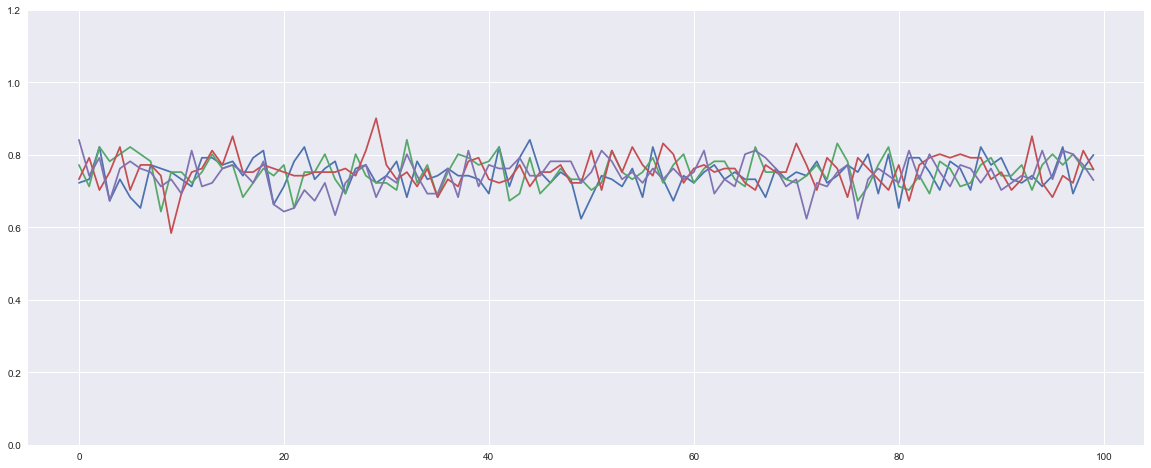

In [74]:
fig = plt.figure(figsize=(20, 8))
for key in distance_data.keys():
    #print(distance_data)
    plt.plot(distance_data[key])

plt.ylim(0, 1.2)
plt.show()